# Project 2 

#### Initial Analysis


In [1]:
import pandas as pd
import sqlite3
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

In [6]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('sqlite_sequence',),
 ('Matches',),
 ('Teams_in_Matches',),
 ('Teams',),
 ('Unique_Teams',)]

##### Inspecting each table in our Database

In [7]:
#sqlite_sequence table
cur.execute('''
SELECT *
FROM sqlite_sequence
''')
df_seq = pd.DataFrame(cur.fetchall())
df_seq.columns = [x[0] for x in cur.description]
df_seq.head()

,name,seq
0,Matches,46774
1,Unique_Teams,128


In [8]:
#Team in matches table(tim= team in matches)
cur.execute('''
SELECT *
FROM Teams_in_Matches
''')
df_tim = pd.DataFrame(cur.fetchall())
df_tim.columns = [x[0] for x in cur.description]
df_tim.head()


,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [9]:
#Unique teams table(ut = unique team)
cur.execute('''
SELECT *
FROM Unique_Teams
''')
df_ut = pd.DataFrame(cur.fetchall())
df_ut.columns = [x[0] for x in cur.description]
df_ut.head(30)

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5
5,M'gladbach,6
6,Wolfsburg,7
7,FC Koln,8
8,Hoffenheim,9
9,Hertha,10


In [10]:
#Teams table
cur.execute('''
SELECT *
FROM Teams
''')
df_team = pd.DataFrame(cur.fetchall())
df_team.columns = [x[0] for x in cur.description]
df_team.head()

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [11]:
#Teams table
cur.execute('''
SELECT *
FROM Matches
''')
df_team = pd.DataFrame(cur.fetchall())
df_team.columns = [x[0] for x in cur.description]
df_team.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


### Q1: name of all teams

In [12]:
df_unique_teams = list(df_ut.TeamName)
print(df_unique_teams)

['Bayern Munich', 'Dortmund', 'Leverkusen', 'RB Leipzig', 'Schalke 04', "M'gladbach", 'Wolfsburg', 'FC Koln', 'Hoffenheim', 'Hertha', 'Mainz', 'Hamburg', 'Werder Bremen', 'Ein Frankfurt', 'Augsburg', 'Freiburg', 'Stuttgart', 'Hannover', 'Ingolstadt', 'Darmstadt', 'Paderborn', 'Nurnberg', 'Braunschweig', 'Greuther Furth', 'Fortuna Dusseldorf', 'Kaiserslautern', 'St Pauli', 'Bochum', 'Karlsruhe', 'Bielefeld', 'Cottbus', 'Duisburg', 'Hansa Rostock', 'Aachen', 'Union Berlin', 'Heidenheim', 'Dresden', 'Sandhausen', 'Erzgebirge Aue', 'Kiel', 'Regensburg', 'Munich 1860', 'Wurzburger Kickers', 'Frankfurt FSV', 'Aalen', 'Oberhausen', 'Osnabruck', 'Koblenz', 'Ahlen', 'Wehen', 'CZ Jena', 'Offenbach', 'Essen', 'Burghausen', 'Unterhaching', 'Saarbrucken', 'Siegen', 'Babelsberg', 'Chemnitz', 'Ein Trier', 'Erfurt', 'F Koln', 'Gutersloh', 'Homburg', 'Leipzig', 'Lubeck', 'Mannheim', 'Meppen', 'Oldenburg', 'Reutlingen', 'Schweinfurt', 'Stuttgarter K', 'TB Berlin', 'Uerdingen', 'Ulm', 'Wattenscheid', 'Wu

### Q2: The total number of goals scored by the team during the 2011 season

In [13]:
#Teams table
cur.execute('''
SELECT *
FROM Matches;
''')
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [14]:
# using 2 queries to get all away team goals and home team goals, then i will join both.
cur.execute('''SELECT AwayTeam, SUM(FTAG) AS Away_Goals
            FROM Matches
            WHERE Season = 2011
            GROUP BY 1;'''
           
           )
df_q2a = pd.DataFrame(cur.fetchall())
df_q2a.columns = [x[0] for x in cur.description]
df_q2a.head(18)

cur.execute('''SELECT HomeTeam, SUM(FTHG) AS Home_Goals
            FROM Matches
            WHERE Season = 2011
            GROUP BY 1;''')
df_q2b = pd.DataFrame(cur.fetchall())
df_q2b.columns = [x[0] for x in cur.description]
df_q2b.head(18)

df_question2 = df_q2b.join(df_q2a, on=None, how='left')
df_question2['Total_Goals_2011'] = df_question2['Home_Goals'] + df_question2['Away_Goals']
df_question2.head()


df_team_goals = df_question2.loc[:, ['AwayTeam', 'Total_Goals_2011']]
df_team_goals.rename(columns={'AwayTeam':'Team'}, inplace=True)
print(df_team_goals.info())
df_team_goals.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
Team                56 non-null object
Total_Goals_2011    56 non-null int64
dtypes: int64(1), object(1)
memory usage: 976.0+ bytes
None


,Team,Total_Goals_2011
0,Aachen,30
1,Arsenal,74
2,Aston Villa,37
3,Augsburg,36
4,Bayern Munich,77


### Q3 The total number of wins/loses and goals that each team earned during the 2011 season

In [15]:
#using a query to do what i did above for goals, but also to count each win and draw and then
#minus total games from the wins and draws to find losses, and then depending on each teams 
#total games i will group them in their corrosponding leagues.
query = '''SELECT a.AwayTeam as Team,
                    SUM(a.Away_Goals + b.Home_Goals) AS Total_Goals,
                    SUM(a.Away_Wins + b.Home_Wins) AS Total_Wins,
                    SUM(a.Away_Draw + b.Home_Draw) AS Total_Draws,
                    SUM(a.Num_Games - a.Away_Wins - b.Home_Wins - a.Away_Draw - b.Home_Draw) AS Total_Losses,
                    a.Num_Games,
                    CASE WHEN a.Num_games = 38 THEN 'EPL' ELSE 'BUNDES' END AS League
                FROM (SELECT AwayTeam,
                        COUNT(AwayTeam) * 2 AS Num_Games,  
                        SUM(FTAG) AS Away_Goals,
                        COUNT(CASE WHEN FTR = 'A' THEN 1 ELSE NULL END) AS Away_Wins,
                        COUNT(CASE WHEN FTR = 'D' THEN 1 ELSE NULL END) AS Away_Draw
                        FROM Matches
                        WHERE Season = 2011
                        GROUP BY 1) a
                LEFT JOIN
                    (SELECT HomeTeam,
                        SUM(FTHG) AS Home_Goals,
                        COUNT(CASE WHEN FTR = 'H' THEN 1 ELSE NULL END) AS Home_Wins,
                        COUNT(CASE WHEN FTR = 'D' THEN 1 ELSE NULL END) AS Home_Draw
                        FROM Matches
                        WHERE Season = 2011
                        GROUP BY 1) b
                ON a.AwayTeam = b.HomeTeam
                GROUP BY 1'''

df_answer = pd.read_sql_query(query, conn)
df_answer

,Team,Total_Goals,Total_Wins,Total_Draws,Total_Losses,Num_Games,League
0,Aachen,30,6,13,15,34,BUNDES
1,Arsenal,74,21,7,10,38,EPL
2,Aston Villa,37,7,17,14,38,EPL
3,Augsburg,36,8,14,12,34,BUNDES
4,Bayern Munich,77,23,4,7,34,BUNDES
5,Blackburn,48,8,7,23,38,EPL
6,Bochum,41,10,7,17,34,BUNDES
7,Bolton,46,10,6,22,38,EPL
8,Braunschweig,37,10,15,9,34,BUNDES
9,Chelsea,65,18,10,10,38,EPL


## Bundesliga Total Wins/Draws and Losses 

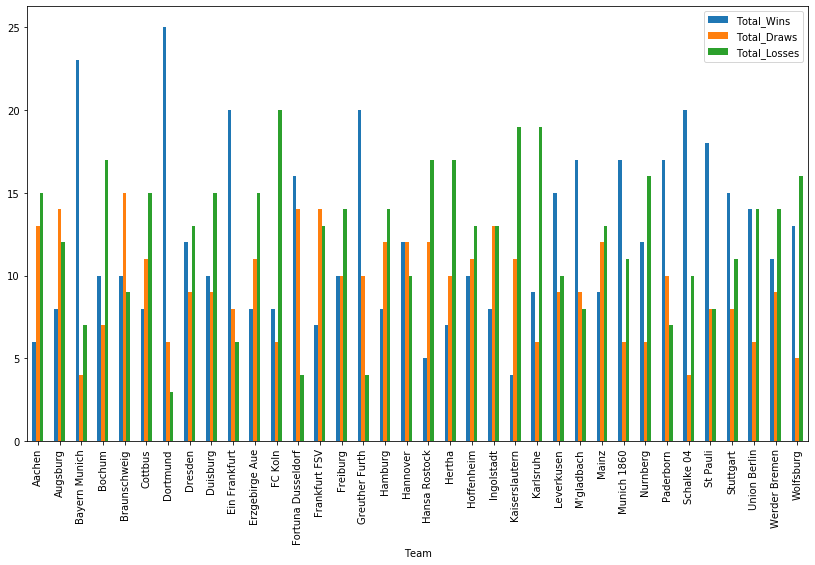

In [16]:

df_bund = df_answer.loc[df_answer['League'] == 'BUNDES']
df_bund.plot(kind='bar', x='Team', y=['Total_Wins', 'Total_Draws', 'Total_Losses'], figsize=(14,8))

## English Premier League Win/Draws and Losses

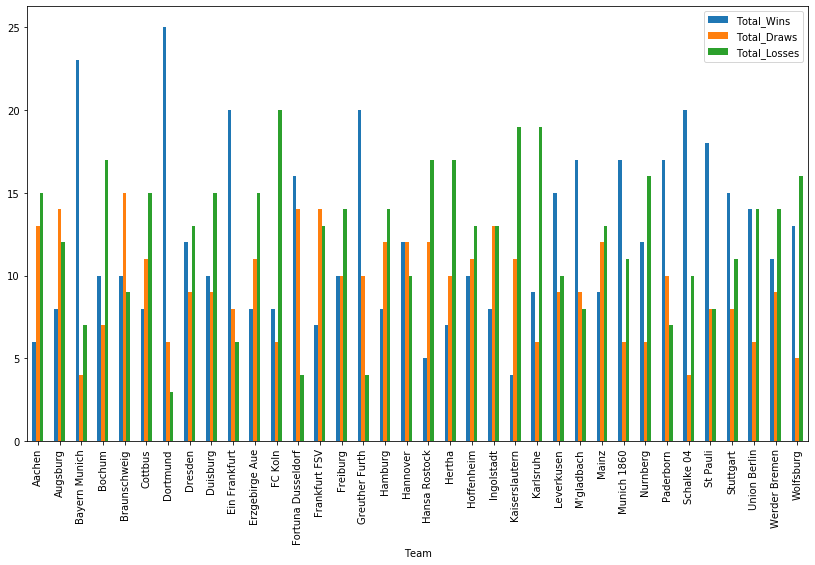

In [17]:
df_epl = df_answer.loc[df_answer['League'] == 'EPL']
df_bund.plot(kind='bar', x='Team', y=['Total_Wins', 'Total_Draws', 'Total_Losses'], figsize=(14,8))

### Q5: team's win percentage on days where it was raining during games in the 2011 season.

In [18]:
# class WeatherGetter(object):
#     def __init__(self):
#         pass
#     def get_keys(self):
#         with open("/Users/khali/.env/DarkSky_api.json") as f:
#             file = json.load(f)
#             api_key = file['api_key']
#         return api_key
    
#     def outcome = []
# for date in str_date_list:
#     url = "https://api.darksky.net/forecast/{}/52.5200,13.4050,{}".format(api_key, date)
#     response = requests.get(url)
#     outcome.append(response)


In [19]:
import json
import requests


def get_keys(path):
    with open(path) as f:
        return json.load(f)

keys = get_keys("/Users/khali/.env/DarkSky_api.json")

api_key = keys['api_key']
print(api_key)

3e66e4ec58e5e379e824431f9516901f


In [20]:
#Teams table
cur.execute('''
SELECT *
FROM Matches
WHERE Season == 2011
''')
df_match = pd.DataFrame(cur.
                        fetchall())
df_match.columns = [x[0] for x in cur.description]
df_match.head(10)

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H
6,1098,D1,2011,2012-02-04,Hamburg,Bayern Munich,1,1,D
7,1099,D1,2011,2012-04-21,Werder Bremen,Bayern Munich,1,2,A
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H


In [21]:
#changing the Datetime to match the format that Darksky required so it can pull the weather on those 
#dates.
date_list = list(df_match['Date'])
str_date_list = []
for date in date_list:
    new_date = date + 'T19:00:00'
    str_date_list.append(new_date)
str_date_list

['2012-03-31T19:00:00',
 '2011-12-11T19:00:00',
 '2011-08-13T19:00:00',
 '2011-11-27T19:00:00',
 '2012-02-18T19:00:00',
 '2012-01-20T19:00:00',
 '2012-02-04T19:00:00',
 '2012-04-21T19:00:00',
 '2011-09-18T19:00:00',
 '2011-10-23T19:00:00',
 '2011-10-01T19:00:00',
 '2012-03-03T19:00:00',
 '2011-08-27T19:00:00',
 '2012-03-17T19:00:00',
 '2011-11-06T19:00:00',
 '2012-05-05T19:00:00',
 '2012-04-11T19:00:00',
 '2011-08-27T19:00:00',
 '2011-12-17T19:00:00',
 '2012-02-18T19:00:00',
 '2012-02-03T19:00:00',
 '2011-08-13T19:00:00',
 '2011-10-29T19:00:00',
 '2012-01-22T19:00:00',
 '2011-12-03T19:00:00',
 '2012-04-14T19:00:00',
 '2011-09-18T19:00:00',
 '2012-03-25T19:00:00',
 '2012-03-10T19:00:00',
 '2012-04-07T19:00:00',
 '2011-11-19T19:00:00',
 '2011-10-14T19:00:00',
 '2011-09-24T19:00:00',
 '2012-04-28T19:00:00',
 '2011-12-18T19:00:00',
 '2012-03-02T19:00:00',
 '2012-03-16T19:00:00',
 '2012-02-17T19:00:00',
 '2011-08-06T19:00:00',
 '2011-11-04T19:00:00',
 '2011-09-16T19:00:00',
 '2011-07-15T19:

In [22]:
df_match['Date'] = str_date_list

In [23]:
df_match.head(10)

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31T19:00:00,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11T19:00:00,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13T19:00:00,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27T19:00:00,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18T19:00:00,Freiburg,Bayern Munich,0,0,D
5,1097,D1,2011,2012-01-20T19:00:00,M'gladbach,Bayern Munich,3,1,H
6,1098,D1,2011,2012-02-04T19:00:00,Hamburg,Bayern Munich,1,1,D
7,1099,D1,2011,2012-04-21T19:00:00,Werder Bremen,Bayern Munich,1,2,A
8,1100,D1,2011,2011-09-18T19:00:00,Schalke 04,Bayern Munich,0,2,A
9,1101,D1,2011,2011-10-23T19:00:00,Hannover,Bayern Munich,2,1,H


In [38]:
this would output the requests
outcome = []
for date in str_date_list:
    url = "https://api.darksky.net/forecast/{}/52.5200,13.4050,{}".format(api_key, date)
    response = requests.get(url)
    outcome.append(response)

In [39]:
print(outcome)

NameError: name 'outcome' is not defined

In [24]:
#This will append to weather list the weather which was in 'icon' when we requested it from DarkSky
weather = []
for x in outcome:
    if "icon" not in x.json()['currently'].keys():
        weather.append('NA')
    else: 
        weather.append(x.json()['currently']['icon'])
weather

NameError: name 'outcome' is not defined

In [25]:
#just Exporting Weather column into a CSV file so i dont have to keep requesting it from API
# as i have limited number of requests

# df_weather = pd.DataFrame(weather)
# df_weather.head()
# df_weather.to_csv(r'C:\Users\khali\Desktop\Flatiron\Project\Project2\project2_football_analysis\Weather.csv')
df_w = pd.read_csv('Weather.csv')
df_w.head()
df_w = df_w.drop('Unnamed: 0',1)
df_w.rename(columns={'0':'Weather'}, inplace=True)
df_w.head()

,Weather
0,partly-cloudy-day
1,NaN
2,clear-day
3,partly-cloudy-night
4,cloudy


In [26]:
df_match.head()
df_match['Weather'] = df_w['Weather']
df_match.head(10)
df_match['Weather'].value_counts()

partly-cloudy-day      258
partly-cloudy-night    254
clear-day               15
rain                    13
cloudy                  13
clear-night             10
fog                     10
Name: Weather, dtype: int64

In [27]:
#Replace NA values with random choice from ratio of other weather entries

c = df_match[df_match['Weather'].notnull()]['Weather']
choice = sorted(c.unique())
print(choice)
prob = df_match['Weather'].value_counts(normalize = True).sort_index()
print(prob)

['clear-day', 'clear-night', 'cloudy', 'fog', 'partly-cloudy-day', 'partly-cloudy-night', 'rain']
clear-day              0.026178
clear-night            0.017452
cloudy                 0.022688
fog                    0.017452
partly-cloudy-day      0.450262
partly-cloudy-night    0.443281
rain                   0.022688
Name: Weather, dtype: float64


In [28]:
df_match['Weather'] = df_match.Weather.map(lambda x: np.random.choice(choice, 1, p= prob)[0]
                                           if pd.isnull(x) else x)
df_match.Weather.value_counts()

partly-cloudy-night    445
partly-cloudy-day      436
clear-day               32
cloudy                  24
rain                    23
clear-night             19
fog                     13
Name: Weather, dtype: int64

In [29]:
#making columns with count for wins, losses(based on if they were home, then 'A' would be a loss
# and if they were Away then 'H' would be a loss and draws for teams in rain, then will pllot them
Rain_Games = df_match[df_match.Weather == 'rain']

HomeTeamRainWin = Rain_Games.groupby('HomeTeam')['FTR'].apply(lambda x: x[x == 'H'].count())
AwayTeamRainWin = Rain_Games.groupby('AwayTeam')['FTR'].apply(lambda x: x[x == 'A'].count())
HomeTeamRainLose = Rain_Games.groupby('HomeTeam')['FTR'].apply(lambda x: x[x == 'A'].count())
AwayTeamRainLose = Rain_Games.groupby('AwayTeam')['FTR'].apply(lambda x: x[x == 'H'].count())
HomeTeamRainDraw = Rain_Games.groupby('HomeTeam')['FTR'].apply(lambda x: x[x == 'D'].count())
AwayTeamRainDraw = Rain_Games.groupby('AwayTeam')['FTR'].apply(lambda x: x[x == 'D'].count())


TotalRainWin = pd.concat([HomeTeamRainWin, AwayTeamRainWin,
                          HomeTeamRainLose,AwayTeamRainLose,
                          HomeTeamRainDraw,AwayTeamRainDraw], axis = 1)

TotalRainWin.columns = ['HomeRainWin', 'AwayRainWin', 
                        'HomeRainLose', 'AwayRainLose', 
                        'HomeRainDraw', 'AwayRainDraw']

TotalRainWin.fillna(value = 0, inplace = True)

TotalRainWin['TotalRainWin'] = TotalRainWin.HomeRainWin + TotalRainWin.AwayRainWin
TotalRainWin['TotalRainLose'] = TotalRainWin.HomeRainLose + TotalRainWin.AwayRainLose
TotalRainWin['TotalRainDraw'] = TotalRainWin.HomeRainDraw + TotalRainWin.AwayRainDraw
TotalRainWin['TotalRainGame'] = TotalRainWin['TotalRainWin'] + TotalRainWin['TotalRainLose'] + TotalRainWin['TotalRainDraw']

TotalRainWin.head()

Summary = TotalRainWin[['TotalRainWin', 'TotalRainLose']]
Summary['Rain_Games'] = round(Summary.TotalRainWin + Summary.TotalRainLose, 2)
Summary.head()

C:\Users\khali\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\khali\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,TotalRainWin,TotalRainLose,Rain_Games
Arsenal,0.0,2.0,2.0
Aston Villa,0.0,1.0,1.0
Augsburg,1.0,0.0,1.0
Bayern Munich,1.0,0.0,1.0
Blackburn,0.0,1.0,1.0


<function matplotlib.pyplot.show(*args, **kw)>

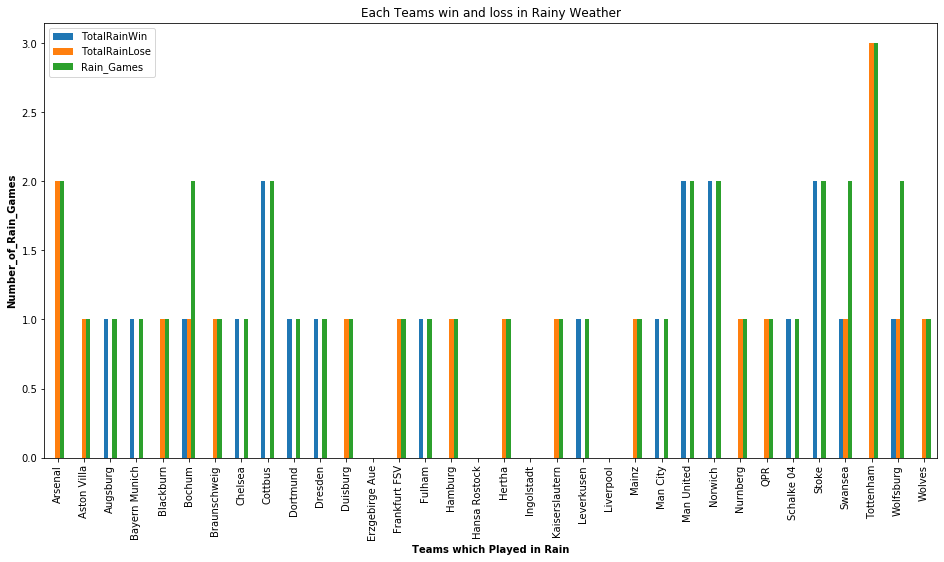

In [30]:
# plot of total games, wins, losses in rain
Summary.plot(kind='bar', figsize=(16,8), title='Each Teams win and loss in Rainy Weather')
plt.ylabel('Number_of_Rain_Games', fontweight='bold')
plt.xlabel('Teams which Played in Rain', fontweight='bold')
plt.show

# MongoDB


we will:
* create a database to put files in
* convert our dataframes into dictionaries 
* adding/inserting our collection into our database after conversion

In [59]:
import pymongo

In [60]:
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")

In [70]:
mydb = myclient['Project2']

In [71]:
myclient.list_database_names()

['admin', 'config', 'example_data', 'local']

In [72]:
mycollection = mydb['Project_2']

In [73]:
myclient.list_database_names()

['admin', 'config', 'example_data', 'local']

In [74]:
mydb.list_collection_names()

[]

In [75]:
df_Q123_to_dict = df_answer.to_dict(orient = 'records')

In [76]:
df_Q123_to_dict

[{'Team': 'Aachen',
  'Total_Goals': 30,
  'Total_Wins': 6,
  'Total_Draws': 13,
  'Total_Losses': 15,
  'Num_Games': 34,
  'League': 'BUNDES'},
 {'Team': 'Arsenal',
  'Total_Goals': 74,
  'Total_Wins': 21,
  'Total_Draws': 7,
  'Total_Losses': 10,
  'Num_Games': 38,
  'League': 'EPL'},
 {'Team': 'Aston Villa',
  'Total_Goals': 37,
  'Total_Wins': 7,
  'Total_Draws': 17,
  'Total_Losses': 14,
  'Num_Games': 38,
  'League': 'EPL'},
 {'Team': 'Augsburg',
  'Total_Goals': 36,
  'Total_Wins': 8,
  'Total_Draws': 14,
  'Total_Losses': 12,
  'Num_Games': 34,
  'League': 'BUNDES'},
 {'Team': 'Bayern Munich',
  'Total_Goals': 77,
  'Total_Wins': 23,
  'Total_Draws': 4,
  'Total_Losses': 7,
  'Num_Games': 34,
  'League': 'BUNDES'},
 {'Team': 'Blackburn',
  'Total_Goals': 48,
  'Total_Wins': 8,
  'Total_Draws': 7,
  'Total_Losses': 23,
  'Num_Games': 38,
  'League': 'EPL'},
 {'Team': 'Bochum',
  'Total_Goals': 41,
  'Total_Wins': 10,
  'Total_Draws': 7,
  'Total_Losses': 17,
  'Num_Games': 34,
 

In [77]:
# adding my dict to my collection
mycollection.insert_many(df_Q123_to_dict)

In [78]:
query = mycollection.find({})
for document in query:
    print(document)

In [85]:
resp1 = requests.get('http://localhost:8889/view/Desktop/Flatiron/Project/Project2/project2_football_analysis/Bundesliga_plot.JPG')
resp2 = requests.get('http://localhost:8889/view/Desktop/Flatiron/Project/Project2/project2_football_analysis/EPL_plot.JPG')
resp3 = requests.get('http://localhost:8889/view/Desktop/Flatiron/Project/Project2/project2_football_analysis/Rain_games.JPG')

In [86]:
img1 = resp1.content
img2 = resp2.content
img3 = resp3.content
newcollection = mydb['Plots']

In [90]:
anewdict1 = {'a': 4, 'image': img1}
anewdict2 = {'a': 4, 'image': img2}
anewdict3 = {'a': 4, 'image': img3}
newcollection.insert_one(anewdict1)
newcollection.insert_one(anewdict2)
newcollection.insert_one(anewdict3)

In [91]:
_.inserted_id

ObjectId('5df608e261a5334fce8e966b')

In [84]:
from IPython.display import Image

results = newcollection.find_one({'_id': _})
newimg = results.get('image')

len(newimg)
# Image(newimg)
with open('./mongo.jpg', 'wb') as f:
    f.write(newimg)

In [46]:
# class MongoDB():
    
#     def __init__(self, database):
#         myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")
#         self.myclient = myclient
#         self.database = database
#         mydb = myclient[self.database]
#         self.mydb = mydb
        
#     def db_to_dict(self, dictionary):
#         df_dict = dictionary_to_dict(orient= 'records')
#         self.df_dict = df_dict
#         return df_dict
    
#     def add_to_db(self, collection):
#         mydb_coll = self.mydb[collection]
#         results = collection.insermany(self.df_dict)
#         self.collection = collection
        

# Final Notes:


we Used our knowledge of SQL, API and NoSQL to perform EPA on the dataset we were given, we used an API to collect Data on the weather of games played in the season 2011.

the limitation was that when we requested the Data for weather it had many Null values and very few rainy days by which to perform our EPA on and analyse the wins/losses and draws of teams on rainy days so its not an accurate representaion in that regard.

we then used MongoDB to export our data, primarily the answer to Q1, Q2 and Q3 into a dictionary format and then into our NoSQL database. and we exported our bargraphs and plots into the NoSQL database as well